In [ ]:
print("Q1. This question is a case study for means clustering.")
print("1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.")

Q1. This question is a case study for means clustering.
1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.


In [ ]:
import numpy as np
import pandas as pd

airbnb = pd.read_csv('airbnb_hw.csv')
airbnb['N_Reviews'] = airbnb['Number Of Reviews']
airbnb['Score'] = airbnb['Review Scores Rating']
airbnb = airbnb.loc[:, ['Price', 'Beds', 'N_Reviews', 'Score']]
print(airbnb.shape)

(30478, 4)


In [ ]:
airbnb.describe()

,Beds,N_Reviews,Score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [ ]:
print(airbnb['Price'].value_counts(), "\n")
airbnb['Price'] = airbnb['Price'].str.replace(',','')
airbnb['Price'] = pd.to_numeric(airbnb['Price'],errors='coerce')

Price
150      1481
100      1207
200      1059
125       889
75        873
         ... 
840         1
306         1
2,695       1
2,520       1
291         1
Name: count, Length: 511, dtype: int64 



In [ ]:
airbnb.describe()

,Price,Beds,N_Reviews,Score
count,30478.000000,30393.000000,30478.000000,22155.000000
mean,163.589737,1.530089,12.018735,91.993230
std,197.785454,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
print(airbnb['Beds'].unique())
airbnb['Beds'] = airbnb['Beds'].fillna(1)

[ 1.  3.  2.  4.  5.  6. 10.  7.  8. 12.  0. 16.  9. 11.]


In [ ]:
airbnb.describe()

,Price,Beds,N_Reviews,Score
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
print(airbnb['N_Reviews'].unique())

[  0   1  39   4   9  80  95  23  14 120  81  17  32  52   3 171  16  19
   2  28  62   6   5  12  40  47  13  35  34  68  42   7  41  15  21   8
  10  29 112  25 132  51 156  30  98  24  74  20 188 221  57  11 242  67
 118  60 136 119  79 106  43  91 105  96 141 146  63  58  18 150  38  55
  89  46  77  48  36  69  26  73  53 165  92  87 108 109  50 127  88  83
 184 179  22  31  82  27 123 247 190 257 217  85 103 157 102  56 125 115
  49  97  54  65  90  44  33 100  37 107 114 116  61 104  71  75 145  84
  93 110 172 148 131 154  86  64  76 129  45 180 140  78 200 175 189 170
 187  72 137  99 101  59  94 124 223 173 151 142 163 121 256 248 149 128
 133  66 117 176 111  70 183 218 192 206 161 216 191 213 178 122 153 177
 167 113 126 135 181 138 143 195 182 198 211 166 139 134 144 174 159 155
 203 201 164 212 236 235 130]


In [ ]:
print(airbnb['Score'].unique())
print(airbnb.shape)

[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.]
(30478, 4)


In [ ]:
# airbnb = airbnb.dropna(subset=["Score"])
# print(airbnb['Score'].unique())
# print(airbnb.shape)

In [ ]:
pd.crosstab(airbnb['Score'].isnull(), airbnb['N_Reviews']>0)
airbnb = airbnb.dropna()

In [ ]:
airbnb.describe()

,Price,Beds,N_Reviews,Score
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [ ]:
print("2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).")

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [ ]:
def maxmin(df):
    df = (df-min(df))/(max(df)-min(df))
    return df

airbnb_data = airbnb.drop('Price',axis=1)
airbnb_data = airbnb_data.apply(maxmin)

In [ ]:
print("3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.")

3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(airbnb_data)
airbnb_data['Cluster'] = model.labels_

In [ ]:
airbnb_data.describe()

,Beds,N_Reviews,Score,Cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.149718
std,0.065205,0.094954,0.110630,1.401749
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000


In [ ]:
print("4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.")

4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.


/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


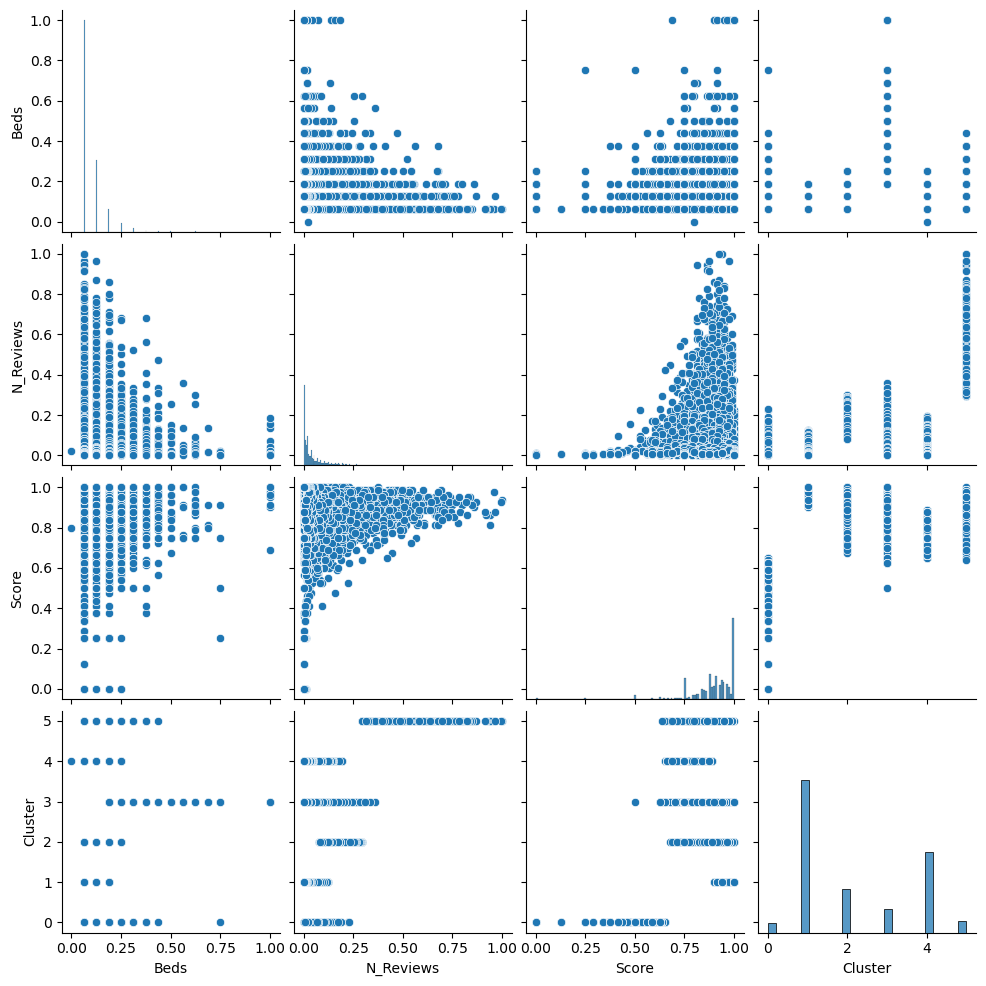

In [ ]:
import seaborn as sns
sns.pairplot(data=airbnb_data)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


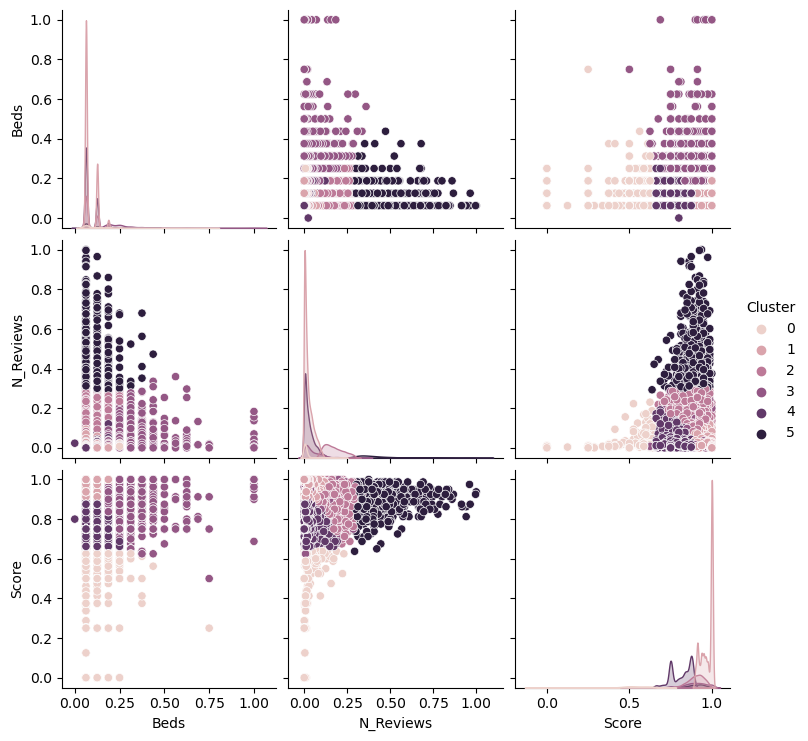

In [ ]:
sns.pairplot(data=airbnb_data, hue = 'Cluster')

In [ ]:
print("5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?")

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?


In [ ]:
airbnb['Cluster'] = model.labels_
airbnb.loc[:,['Price','Cluster'] ].groupby('Cluster').describe()

Price                                                             
           count        mean         std   min    25%    50%     75%      max
Cluster                                                                      
0          632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   5000.0
1        10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00  10000.0
2         3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   1000.0
3         1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   4500.0
4         5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   5000.0
5          792.0  133.224747   83.088608  27.0   80.0  110.0  167.50    875.0

In [ ]:
print("It seems that the cluster with the highest average rental prices is cluster three, though cluster one has the highest max price")

It seems that the cluster with the highest average rental prices is cluster three, though cluster one has the highest max price


In [ ]:
print("6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.")

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.


In [ ]:
k_bar = 15
SSE = np.zeros(k_bar)
k_grid = np.arange(1,k_bar+1)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(airbnb_data)
    SSE[k] = model.inertia_

Text(0.5, 1.0, 'Scree Plot')

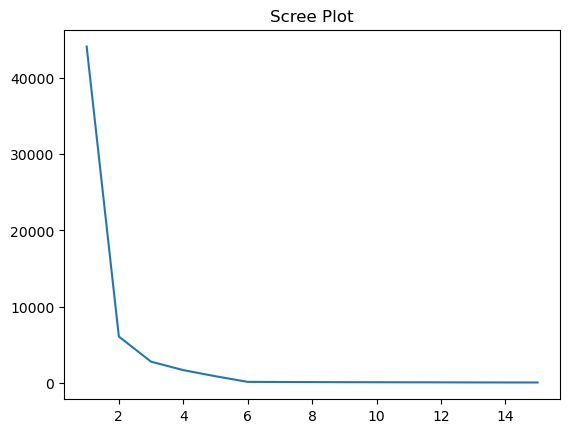

In [ ]:
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [ ]:
print("I'm going to pick k = 3 because that's about the point the slope of the line changes")

I'm going to pick k = 3 because that's about the point the slope of the line changes


/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Price                                                           
           count        mean         std   min   25%    50%    75%      max
Cluster                                                                    
0        11161.0  151.228743  151.963553  10.0  85.0  129.0  190.0  10000.0
1         6346.0  131.830602  100.510035  20.0  75.0  110.0  169.0   5000.0
2         4648.0  194.677065  184.430237  22.0  99.0  150.0  225.0   4500.0

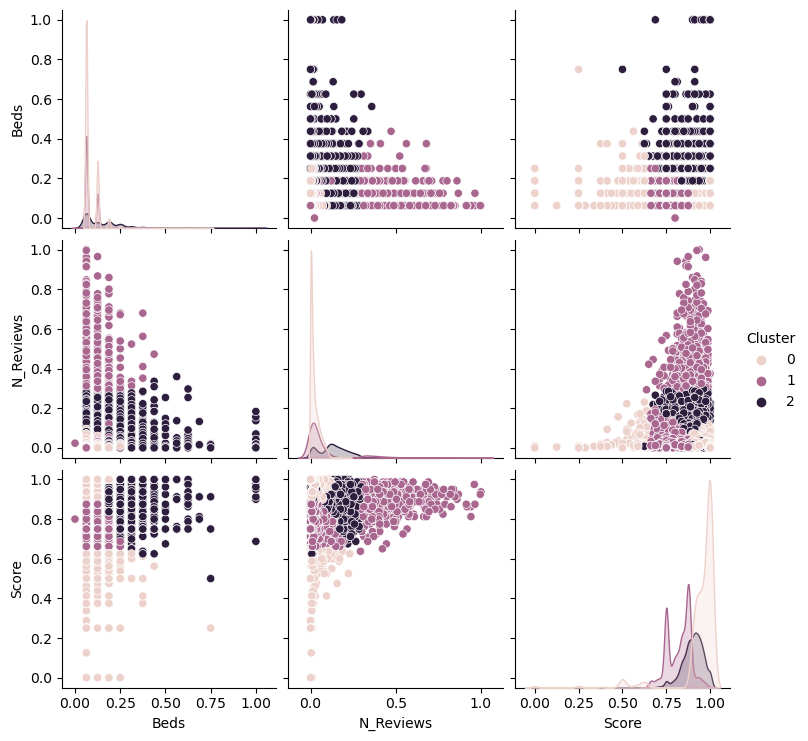

In [ ]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(airbnb_data) # Fit the emodel
airbnb_data['Cluster'] = model.labels_
sns.pairplot(data=airbnb_data, hue='Cluster')
airbnb['Cluster'] = model.labels_
airbnb.loc[:,['Price','Cluster'] ].groupby('Cluster').describe()

In [ ]:
print("In this case with a scree plot, it seems that cluster two has the highest average nightly price, wherease cluster zero has the highest max price")

In this case with a scree plot, it seems that cluster two has the highest average nightly price, wherease cluster zero has the highest max price


In [ ]:
print("Q2. This is a question about means clustering. We want to investigate how adjusting the 'noisiness' of the data impacts the quality of the algorithm and the difficulty of picking")

Q2. This is a question about means clustering. We want to investigate how adjusting the 'noisiness' of the data impacts the quality of the algorithm and the difficulty of picking


In [ ]:
print("1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.")

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.


In [ ]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1 = createData(1.0)
df2 = createData(2.0)

In [ ]:
print("2. Make scatterplots of the points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?")

2. Make scatterplots of the points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


0.125


<Axes: xlabel='x1', ylabel='x2'>

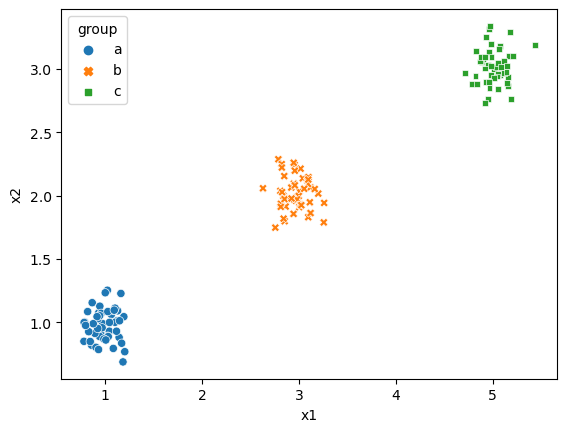

In [ ]:
print("0.125")
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

0.25


<Axes: xlabel='x1', ylabel='x2'>

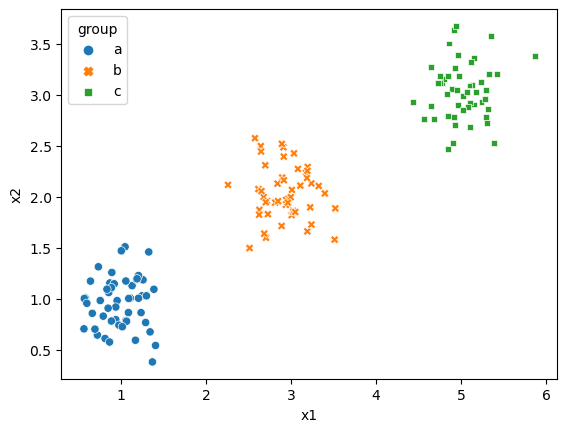

In [ ]:
print("0.25")
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

0.5


<Axes: xlabel='x1', ylabel='x2'>

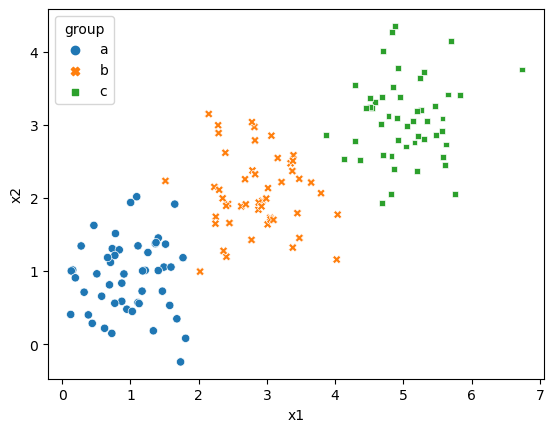

In [ ]:
print("0.5")
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

1.0


<Axes: xlabel='x1', ylabel='x2'>

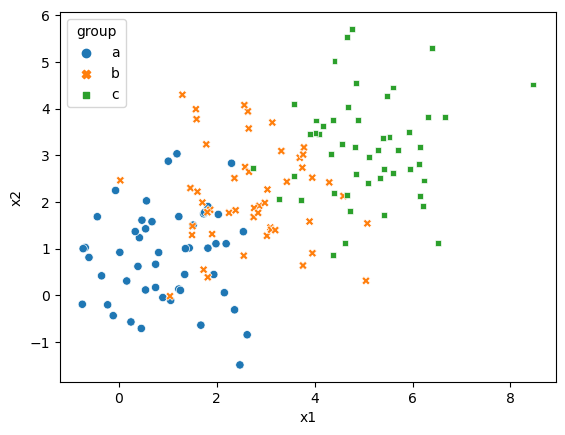

In [ ]:
print("1.0")
sns.scatterplot(data = df1, x = 'x1',y='x2',hue='group',style='group')

2.0


<Axes: xlabel='x1', ylabel='x2'>

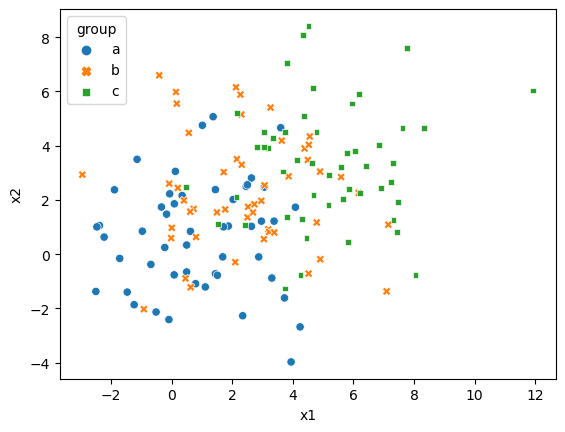

In [ ]:
print("2.0")
sns.scatterplot(data = df2, x = 'x1',y='x2',hue='group',style='group')

In [ ]:
print("As the noise goes up from 0.125 to 2.0, the grouping gets closer and closer which means more collisions of clusters to the point there aren't really even clusters anymore")

As the noise goes up from 0.125 to 2.0, the grouping gets closer and closer which means more collisions of clusters to the point there aren't really even clusters anymore


In [ ]:
print("3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear 'elbow') and your ability to definitively select a k")

3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear 'elbow') and your ability to definitively select a k


In [ ]:
def maxmin(df): # Max-min scaler function
    df = (df-min(df))/(max(df)-min(df))
    return df

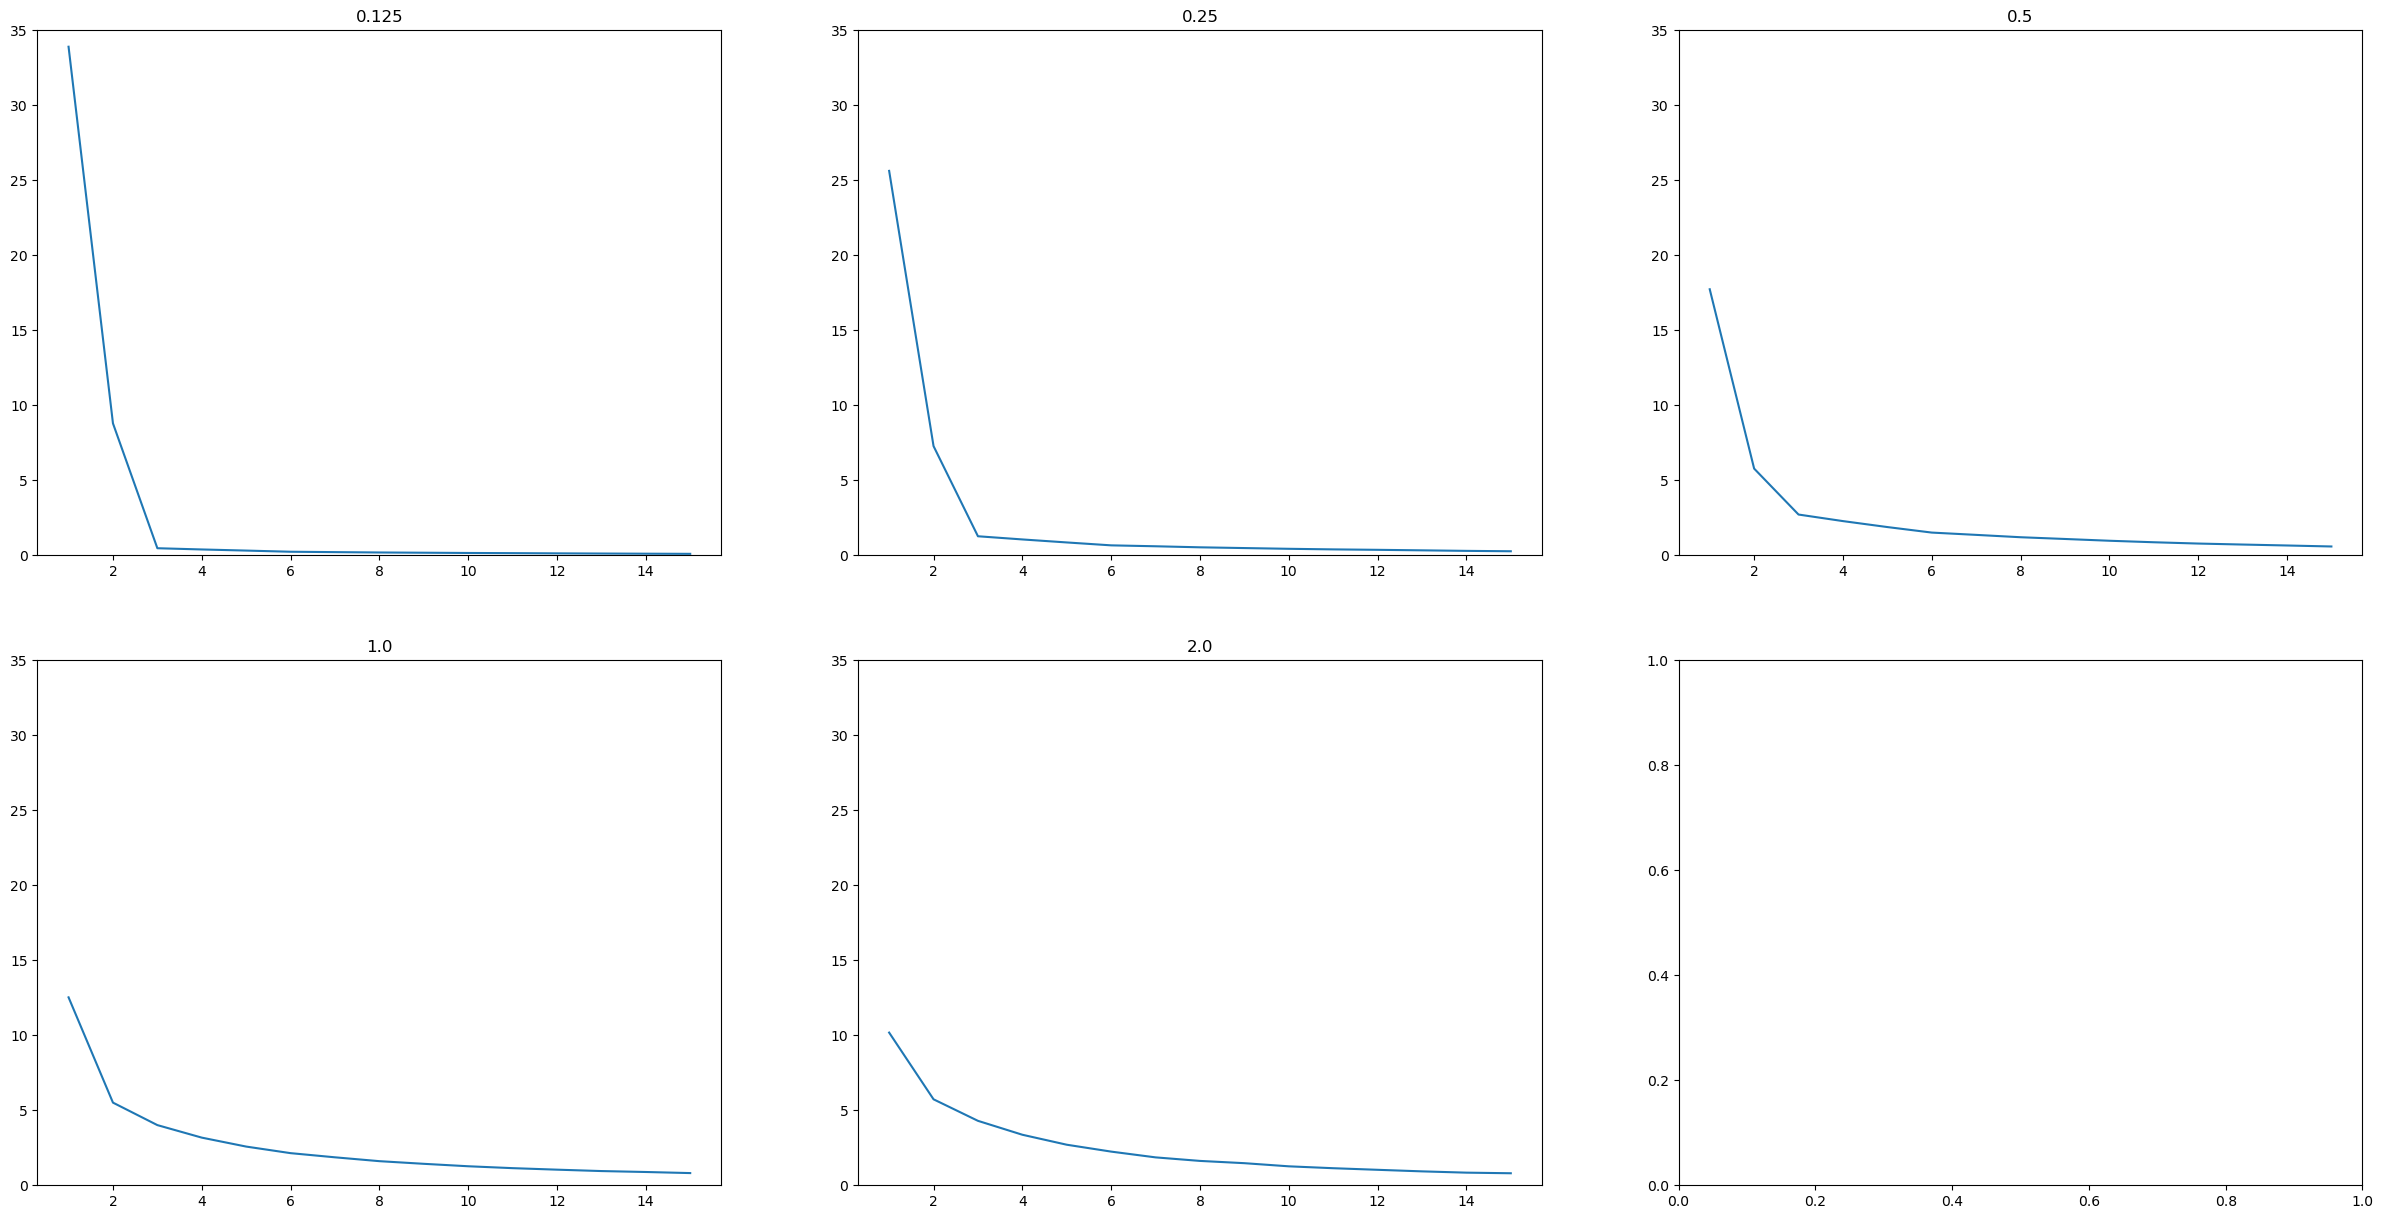

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

x_axis = 0
y_axis = 0
plot, axes = plt.subplots(2, 3, figsize=(30, 15))
noise_levels = ['0.125', '0.25', '0.5', '1.0', '2.0']
noise_count = 0

for df in [df0_125,df0_25,df0_5]:
    df = df.loc[ : , ['x1','x2'] ] # Select data to cluster
    df = df.apply(maxmin)

    k_bar = 15
    SSE = np.zeros(k_bar)
    k_grid = np.arange(1,k_bar+1)

    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(df)
        SSE[k] = model.inertia_
    axes[x_axis, y_axis].plot(k_grid, SSE)
    axes[x_axis, y_axis].set_ylim(0, 35)
    title = noise_levels[noise_count]
    axes[x_axis, y_axis].set_title(title)

    y_axis = y_axis + 1
    noise_count = noise_count + 1

x_axis = 1
y_axis = 0
for df in [df1,df2]:
    df = df.loc[ : , ['x1','x2'] ] # Select data to cluster
    df = df.apply(maxmin)

    k_bar = 15
    SSE = np.zeros(k_bar)
    k_grid = np.arange(1,k_bar+1)

    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(df)
        SSE[k] = model.inertia_
    axes[x_axis, y_axis].plot(k_grid, SSE)
    axes[x_axis, y_axis].set_ylim(0, 35)
    title = noise_levels[noise_count]
    axes[x_axis, y_axis].set_title(title)

    y_axis = y_axis + 1
    noise_count = noise_count + 1


plt.show()

In [ ]:
print("It seems that the more noise there is, the less distinct the elbow is")

It seems that the more noise there is, the less distinct the elbow is


In [ ]:
print("4. Explain the intuition of the elbow, using this numerical simulation as an example.")

4. Explain the intuition of the elbow, using this numerical simulation as an example.


In [ ]:
print("It appears to me that the intuition behind an elbow is that the k value at the 'elbow point' is the ideal number of clusters if you want well-definied clusters. That means that if the points on the graph don't really have any well-defined clusters at all because there is a lot of noise, the scree graph will show close to a straight line and no elbow.")

It appears to me that the intuition behind an elbow is that the k value at the 'elbow point' is the ideal number of clusters if you want well-definied clusters. That means that if the points on the graph don't really have any well-defined clusters at all because there is a lot of noise, the scree graph will show close to a straight line and no elbow.


In [ ]:
print("Q3. We looked at computer vision with kNN in a previous question.")
print("1.Can k means clustering correctly group digits, even if we don't know which symbols are which?")

Q3. We looked at computer vision with kNN in a previous question.
1.Can k means clustering correctly group digits, even if we don't know which symbols are which?


In [ ]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/fa/39/5aae571e5a5f4de9c3445dae08a530498e5c53b0e74410eeeb0991c79047/gast-0.5.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━

In [3]:
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("The y_test and y_train vectors, for each index i, tell you want number is written in the corresponding index in X_train[i] and X_test[i]. The value of X_train[i] and X_test[i], however, is a 2828 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a 'pixel' and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:")

The y_test and y_train vectors, for each index i, tell you want number is written in the corresponding index in X_train[i] and X_test[i]. The value of X_train[i] and X_test[i], however, is a 2828 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a 'pixel' and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:


7 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 19

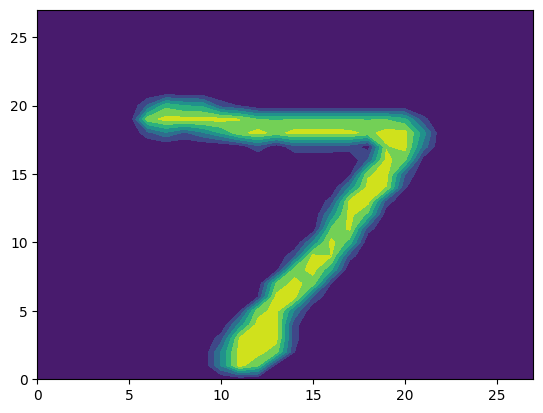

2 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   

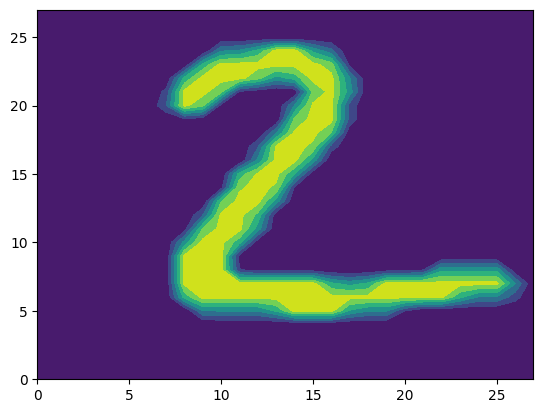

1 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254 109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  84 254  63   

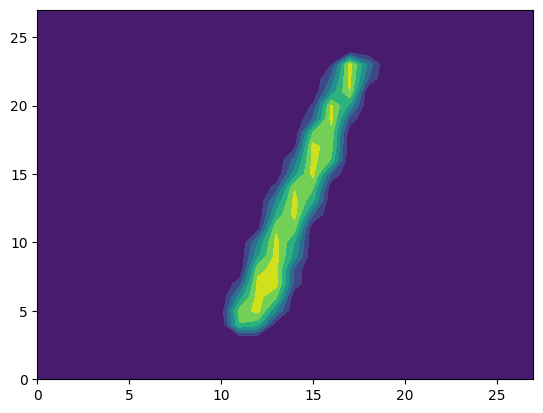

0 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  11 150 253 202  31   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  37 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  21 197 251 251 253 107   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 110 190 251 251 251 253 169 109  62   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 253 251 251 251 251 253 251 251 22

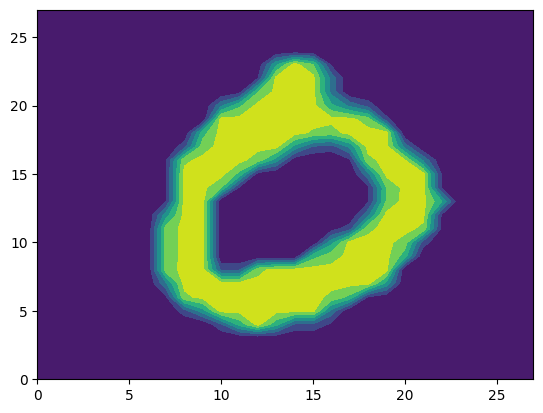

4 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  50 224   0   0   0   0   0   0   0  70  29   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 121 231   0   0   0   0   0   0   0 148 168   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 195 231   0   0   0   0   0   0   0  96 210  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  69 252 134   0   0   0   0   0   0   

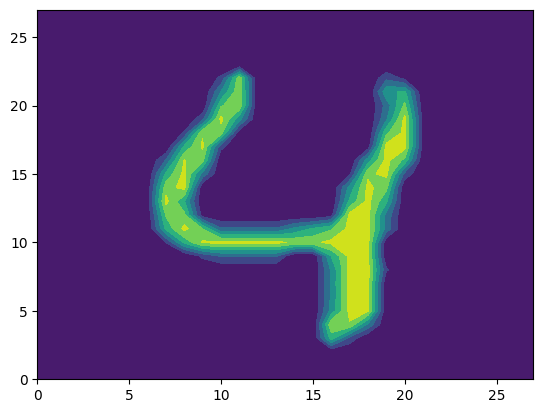

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()

In [6]:
print("2. What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?")

2. What is the shape of X_train and X_test? What is the shape of X_train[i] and X_test[i] for each index i? What is the shape of y_train and y_test?


In [7]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
Y_train shape: (60000,)
Y_test shape: (10000,)


In [8]:
for i in range(5):
    print(f"i: {i}")
    print(f"X_train[{i}] shape: {X_train[i].shape}")
    print(f"X_test[{i}] shape: {X_test[i].shape}", '\n')

i: 0
X_train[0] shape: (28, 28)
X_test[0] shape: (28, 28) 

i: 1
X_train[1] shape: (28, 28)
X_test[1] shape: (28, 28) 

i: 2
X_train[2] shape: (28, 28)
X_test[2] shape: (28, 28) 

i: 3
X_train[3] shape: (28, 28)
X_test[3] shape: (28, 28) 

i: 4
X_train[4] shape: (28, 28)
X_test[4] shape: (28, 28) 



In [9]:
print("Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the index-th element of X_test into a 28x28=784-length row vector of values, rather than a matrix. Turn X_train into an N x 784 matrix that is suitable for scikit-learn's kNN classifier where N is the number of observations and 784 = 28 * 28(you could use, for example, a for loop).")

Use Numpy's .reshape() method to covert the training and testing data from a matrix into an vector of features. So, X_test[index].reshape((1,784)) will convert the index-th element of X_test into a 28x28=784-length row vector of values, rather than a matrix. Turn X_train into an N x 784 matrix that is suitable for scikit-learn's kNN classifier where N is the number of observations and 784 = 28 * 28(you could use, for example, a for loop).


In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

# Z train stuff
Z_train = []
for i in range(60000): # based off of earlier shape
    row = X_train[i].reshape((1,784)) # based off of 784 given
    Z_train.append(row[0])
Z_train = pd.DataFrame(Z_train)


# Z test stuff
Z_test = []
for i in range(len(y_test)):
    row = X_test[i].reshape((1,784)) # Turn the matrix for i into a row vector of features
    Z_test.append(row[0]) # Append the row vector to the list
Z_test = pd.DataFrame(Z_test)

# save everything to a dataframe
Z_train.to_csv('Z_train.csv')
Z_test.to_csv('Z_test.csv')

In [11]:
print("4. Use means clustering on the reshaped X_test data with k=10.")

4. Use means clustering on the reshaped X_test data with k=10.


In [12]:
from sklearn.cluster import KMeans # Import kmc

def maxmin(x):
    if np.sum(x) != 0:
        u = (x-min(x))/(max(x)-min(x))
        return u
    else:
        return x

means_train = Z_train.apply(maxmin)
means_test = Z_test.apply(maxmin)

model = KMeans(n_clusters=10, n_init=20).fit(means_train)

In [13]:
print("5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can MC recover the latent digits 0 to 9, without even knowing what those digits were?")

5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can MC recover the latent digits 0 to 9, without even knowing what those digits were?


In [14]:
y_hat = model.predict(means_test)
pd.crosstab(y_test, y_hat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,4,2,0,4,49,30,423,17,448,3
1,469,1,660,0,2,2,0,1,0,0
2,84,708,59,30,65,25,19,28,3,11
3,7,40,73,15,695,7,19,146,1,7
4,36,5,30,559,0,35,1,5,1,310
5,105,4,23,56,288,19,40,277,9,71
6,30,18,28,22,2,795,24,18,20,1
7,57,13,59,292,0,1,1,1,1,603
8,44,6,34,31,208,10,11,589,6,35


In [3]:
print("Correspondence of Various Clusters\n0: 6 and 8\n1: 0 and 2\n2: 1\n3: 4 and 7\n4: 3 and 9\n5: 1, 4 and 7\n6: 5\n7: 3 and 9\n8: 4 and 7\n9: 3 and 9")

Correspondence of Various Clusters
0: 6 and 8
1: 0 and 2
2: 1
3: 4 and 7
4: 3 and 9
5: 1, 4 and 7
6: 5
7: 3 and 9
8: 4 and 7
9: 3 and 9


In [5]:
print("It seems like number 7 was clustered into 3, 5, and 8 frequently, number 9 into 4, 7 and 9, number 1 into 2 and 5, three into 4, 7, and 9, and number four into 3, 5, and 8. It seems numbers zero, six, and eight were the easiest to distinguish while the rest were more challenging, so I would not say it was particularly great at recovering latent digits as about half were clustered correctly so the correspondance wasn't super great either.")

It seems like number 7 was clustered into 3, 5, and 8 frequently, number 9 into 4, 7 and 9, number 1 into 2 and 5, three into 4, 7, and 9, and number four into 3, 5, and 8. It seems numbers zero, six, and eight were the easiest to distinguish while the rest were more challenging, so I would not say it was particularly great at recovering latent digits as about half were clustered correctly so the correspondance wasn't super great either.


In [15]:
print("6. If you use a scree plot to determine the number of clusters, does it pick 10 (the true number of digits), or not? If it fails to pick , which digits does it tend to combine into the same classification?")

6. If you use a scree plot to determine the number of clusters, does it pick 10 (the true number of digits), or not? If it fails to pick , which digits does it tend to combine into the same classification?


In [16]:
import seaborn as sns
k_bar = 20
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)

In [17]:
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(means_train)
    SSE[k] = model.inertia_

Text(0.5, 1.0, 'Scree Plot')

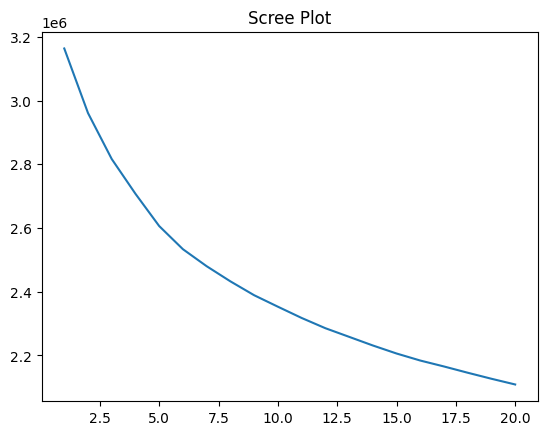

In [18]:
sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [1]:
print("The line on the graph isn't clear enough to say whether or not the scree plot shows 10. Probably everything between 5 and 10 could be in the same connection.")

The line on the graph isn't clear enough to say whether or not the scree plot shows 10. Probably everything between 5 and 10 could be in the same connection.
